# Exploratory Data Analysis(EDA)

In [14]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [15]:
# Apply settings
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [27]:
# Load dataset
# Load cleaned data
data = pd.read_csv("../data/cleaned_data.csv")

data.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER Status,Neoplasm Histologic Grade,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall_Survival_Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's_Vital_Status
0,75.65,Mastectomy,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positive,3.0,Negative,Ductal/NST,Yes,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,43.19,Breast Conserving,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positive,3.0,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,48.87,Mastectomy,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positive,2.0,Negative,Ductal/NST,Yes,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,47.68,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positive,2.0,Negative,Mixed,Yes,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,76.97,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positive,3.0,Negative,Mixed,Yes,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [28]:
# Data back-up and info
df = data.copy()

# Dataset overview

In [29]:
# Shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (2509, 30)


In [30]:
# Dataset Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age at Diagnosis                2498 non-null   float64
 1   Type of Breast Surgery          1955 non-null   object 
 2   Cancer Type Detailed            2509 non-null   object 
 3   Cellularity                     1917 non-null   object 
 4   Chemotherapy                    1980 non-null   object 
 5   Pam50 + Claudin-low subtype     1980 non-null   object 
 6   Cohort                          2498 non-null   float64
 7   ER Status                       2469 non-null   object 
 8   Neoplasm Histologic Grade       2388 non-null   float64
 9   HER2 Status                     1980 non-null   object 
 10  Tumor Other Histologic Subtype  2374 non-null   object 
 11  Hormone Therapy                 1980 non-null   object 
 12  Inferred Menopausal State       19

In [31]:
# Column details
all_cols = df.columns.to_list()
numeric_cols = df.select_dtypes(include="number").columns.tolist()
categorical_cols = [c for c in df.select_dtypes(include="object") if c != "Overall_Survival_Status"]

print("All columns: \n", all_cols)
print("\nNumeric Columns: \n", numeric_cols)
print("\nCategorical Columns: \n", categorical_cols)

All columns: 
 ['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall_Survival_Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', "Patient's_Vital_Status"]

Numeric Columns: 
 ['Age at Diagnosis', 'Cohort', 'Neoplasm Histologic Grade', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Overall Survival (Months)', 'Relapse Free Status (Months)', 'Tumor Size', 'Tumor Stage']

Categorical Columns: 
 ['Type of Breast Surgery', 'Cancer Type Detai

In [32]:
# Statistical summary
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age at Diagnosis,2498.0,NaN,NaN,NaN,60.4203,13.032997,21.93,50.92,61.11,70.0,96.29
Type of Breast Surgery,1955,2,Mastectomy,1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancer Type Detailed,2509,8,Breast Invasive Ductal Carcinoma,1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cellularity,1917,3,High,965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chemotherapy,1980,2,No,1568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pam50 + Claudin-low subtype,1980,7,LumA,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cohort,2498.0,NaN,NaN,NaN,2.90032,1.962216,1.0,1.0,3.0,4.0,9.0
ER Status,2469,2,Positive,1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neoplasm Histologic Grade,2388.0,NaN,NaN,NaN,2.41206,0.649363,1.0,2.0,3.0,3.0,3.0
HER2 Status,1980,2,Negative,1733,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Null values
print("Null Count Summary: \n")
df.isnull().sum()

Null Count Summary: 



Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER Status                          40
Neoplasm Histologic Grade         121
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall_Survival_Status           528
PR Status                         529
Radio Therapy                     529
Relapse Free Status (Months)      121
Relapse Free Status                21
Sex                                 0
3-Gene class

## Imputing null

In [34]:
from sklearn.impute import SimpleImputer

# Numeric imputer: replace NaNs with mean
num_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Categorical imputer: replace NaNs with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [35]:
# Null values
print("Null Count Summary: \n")
df.isnull().sum()

Null Count Summary: 



Age at Diagnosis                    0
Type of Breast Surgery              0
Cancer Type Detailed                0
Cellularity                         0
Chemotherapy                        0
Pam50 + Claudin-low subtype         0
Cohort                              0
ER Status                           0
Neoplasm Histologic Grade           0
HER2 Status                         0
Tumor Other Histologic Subtype      0
Hormone Therapy                     0
Inferred Menopausal State           0
Integrative Cluster                 0
Primary Tumor Laterality            0
Lymph nodes examined positive       0
Mutation Count                      0
Nottingham prognostic index         0
Oncotree Code                       0
Overall Survival (Months)           0
Overall_Survival_Status           528
PR Status                           0
Radio Therapy                       0
Relapse Free Status (Months)        0
Relapse Free Status                 0
Sex                                 0
3-Gene class

In [36]:
# Statistical summary
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age at Diagnosis,2509.0,NaN,NaN,NaN,60.4203,13.004385,21.93,50.94,61.05,70.0,96.29
Type of Breast Surgery,2509,2,Mastectomy,1724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancer Type Detailed,2509,8,Breast Invasive Ductal Carcinoma,1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cellularity,2509,3,High,1557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chemotherapy,2509,2,No,2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pam50 + Claudin-low subtype,2509,7,LumA,1229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cohort,2509.0,NaN,NaN,NaN,2.90032,1.957908,1.0,1.0,3.0,4.0,9.0
ER Status,2509,2,Positive,1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neoplasm Histologic Grade,2509.0,NaN,NaN,NaN,2.41206,0.633505,1.0,2.0,2.41206,3.0,3.0
HER2 Status,2509,2,Negative,2262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df = df.dropna(subset=["Overall_Survival_Status"])

In [38]:
print(df.isna().sum())

Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall_Survival_Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status               0
Sex                               0
3-Gene classifier subtype         0
Tumor Size                  

### Survival probability

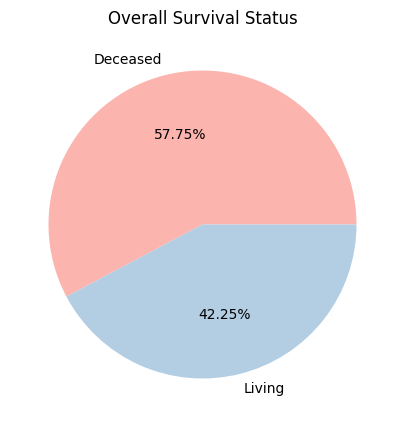

Overall Survival Status:

Overall_Survival_Status
Deceased    1144
Living       837
Name: count, dtype: int64


In [39]:
survival_status = df["Overall_Survival_Status"].value_counts()
# Plot pie chart
plt.figure(figsize=(6,5))
plt.pie(
    survival_status, 
    labels=survival_status.index,      # categorical labels
    autopct="%.2f%%",                  # show percentages
    colors=plt.cm.Pastel1.colors       # optional: pastel colors
)
plt.title("Overall Survival Status")
plt.show()

# Print counts
print("Overall Survival Status:\n")
print(survival_status)

### Categorical value distribution

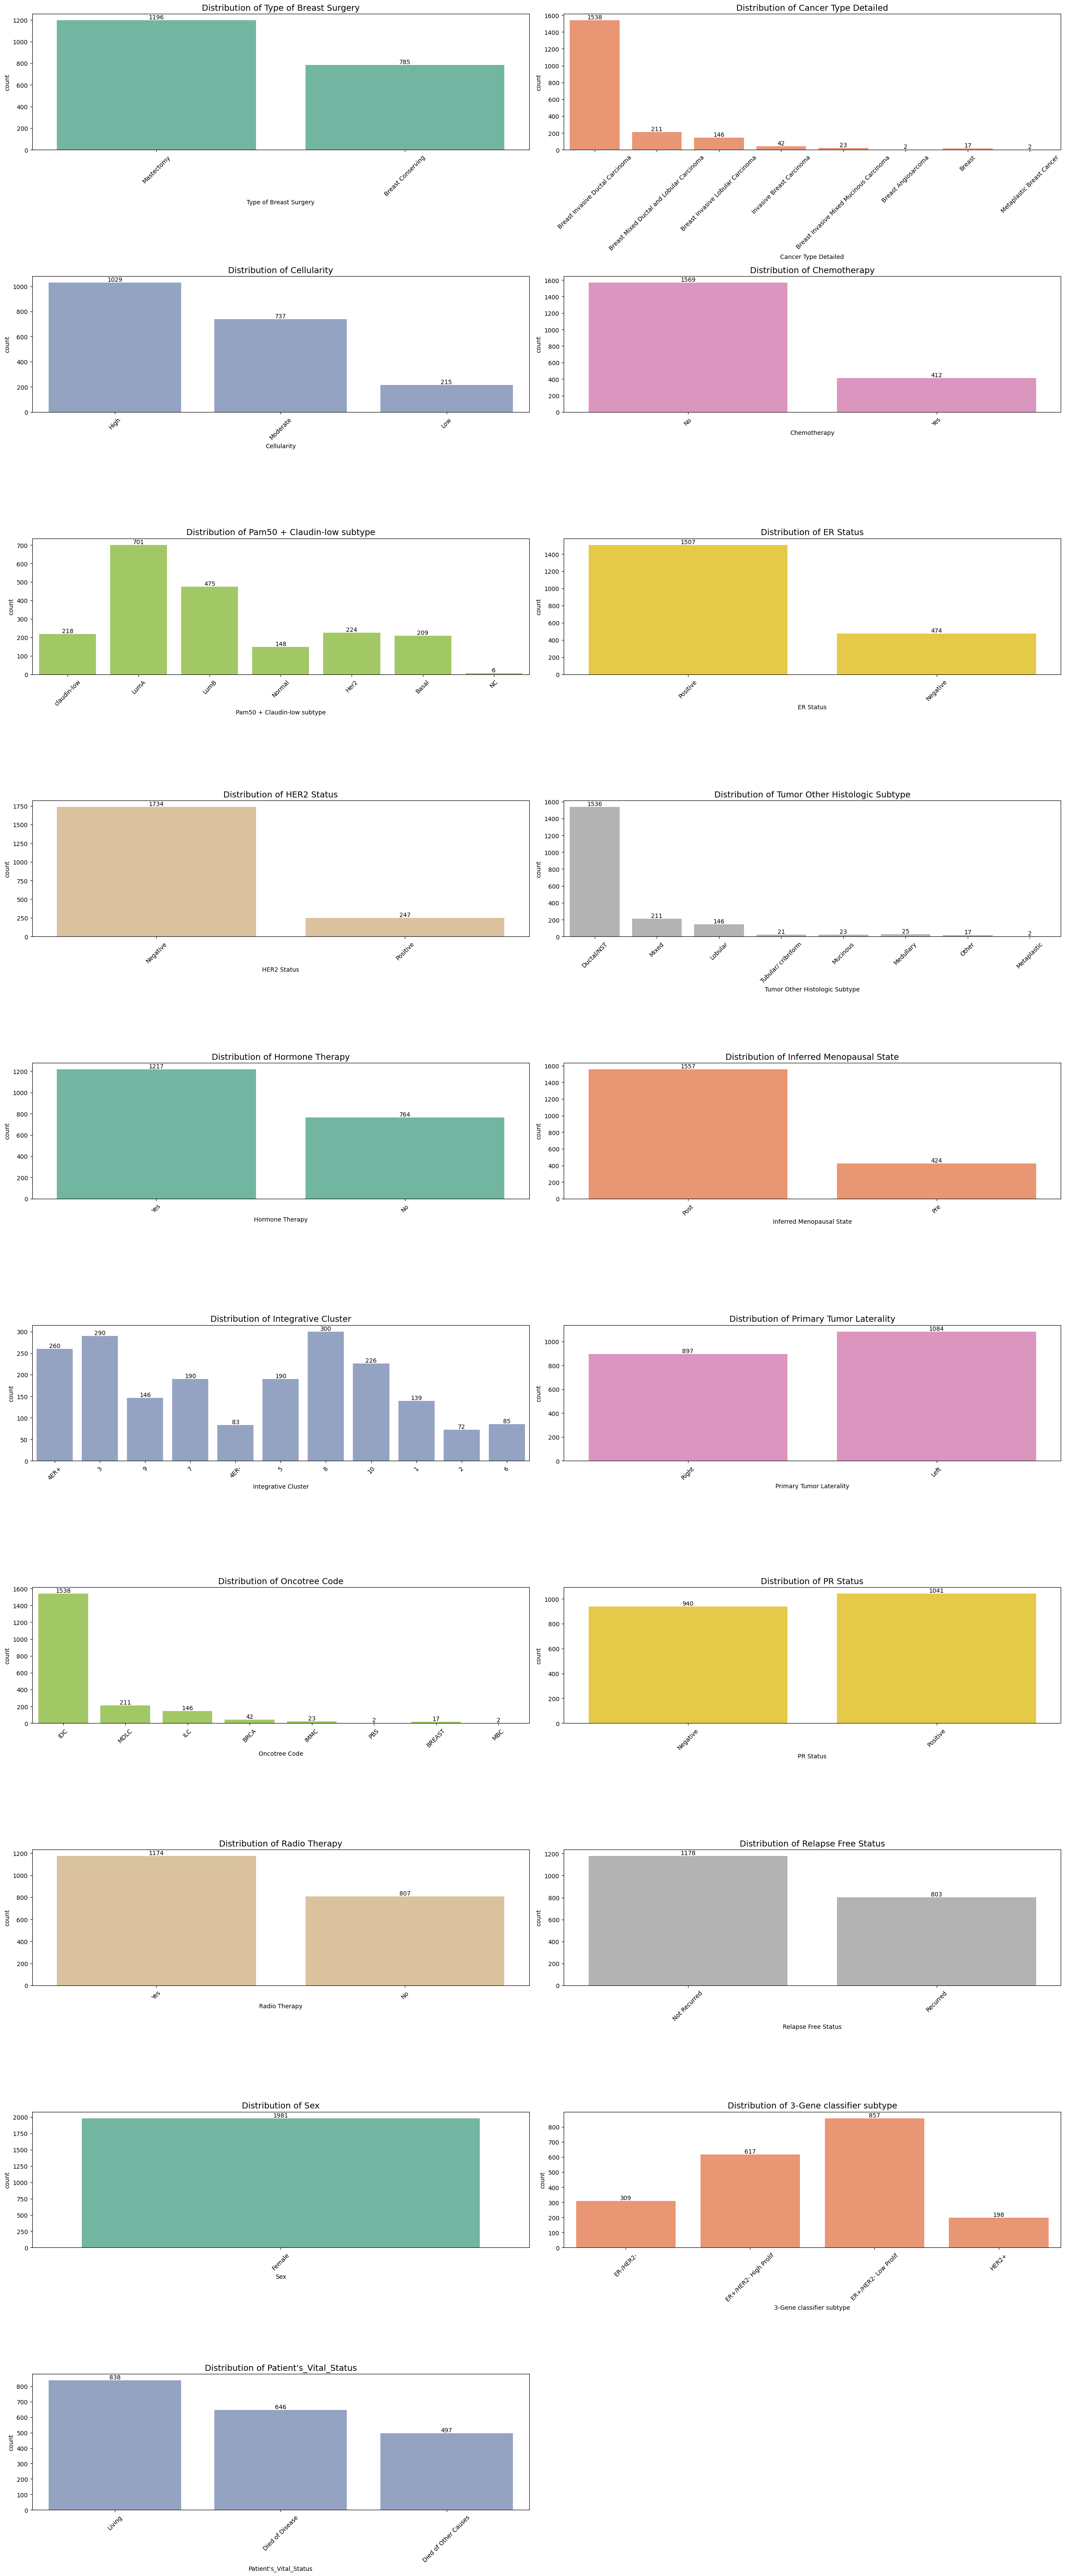

In [40]:
palettes = sns.color_palette("Set2", len(categorical_cols))

plt.figure(figsize=(25, 60))

for i, (col, color) in enumerate(zip(categorical_cols, palettes), 1):
    ax = plt.subplot(len(categorical_cols)//2 + 1, 2, i)
    
    sns.countplot(data=df, x=col, palette=[color])
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45)

    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

### Numerical value distribution

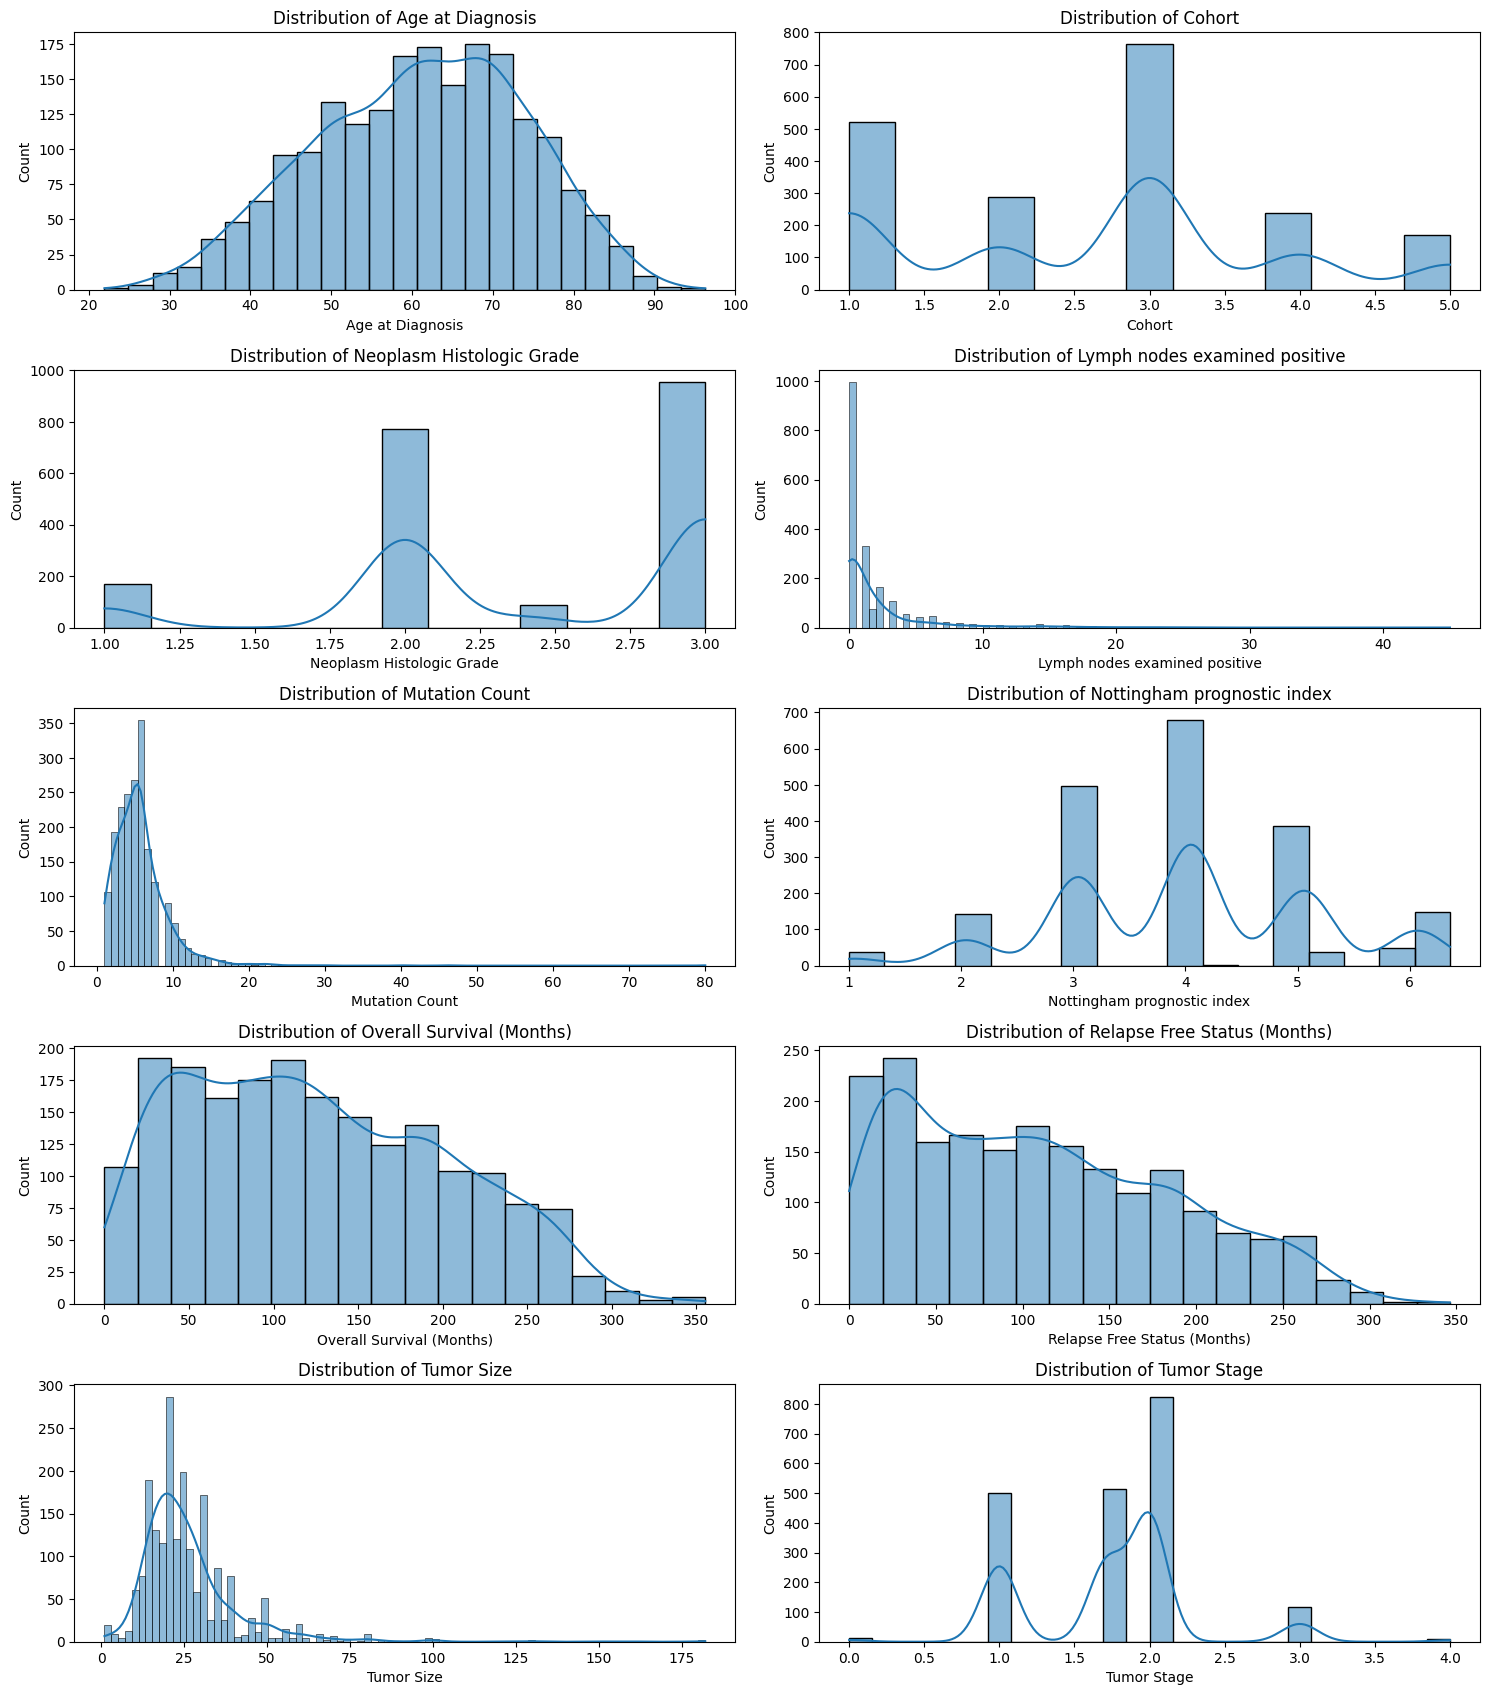

In [41]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

    
plt.tight_layout()
plt.show()

### Survival chances by categorical values

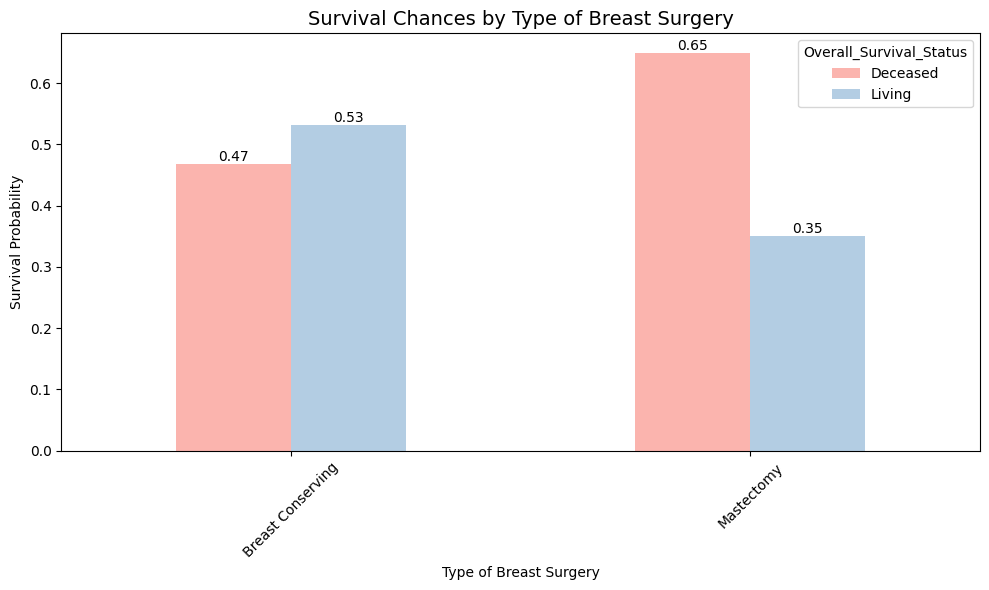

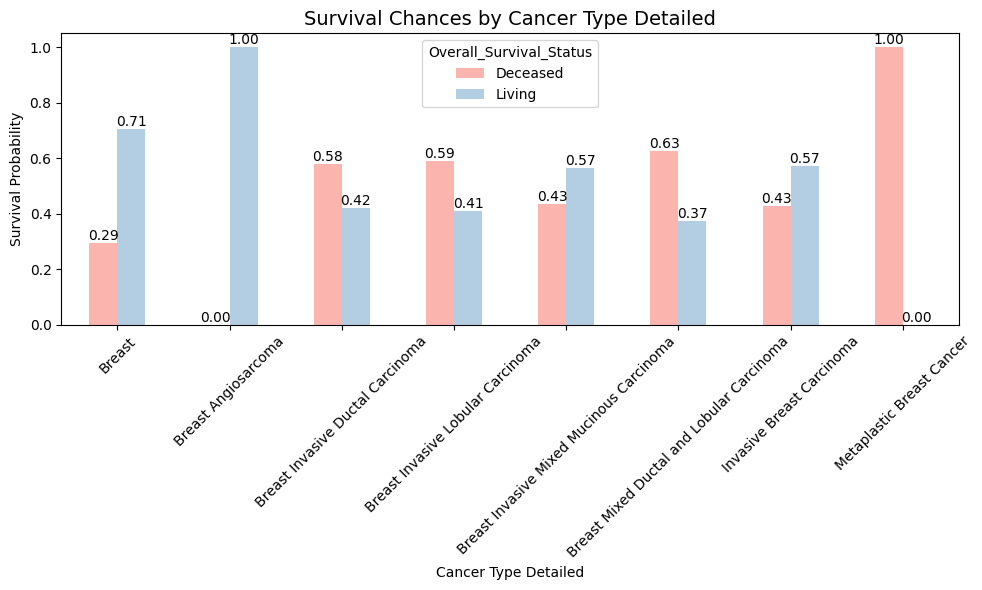

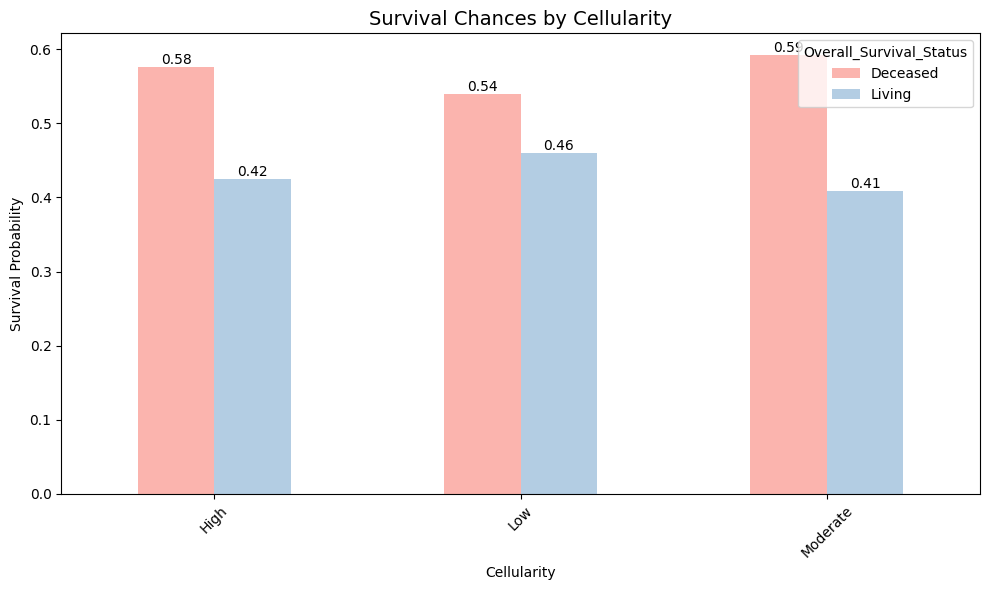

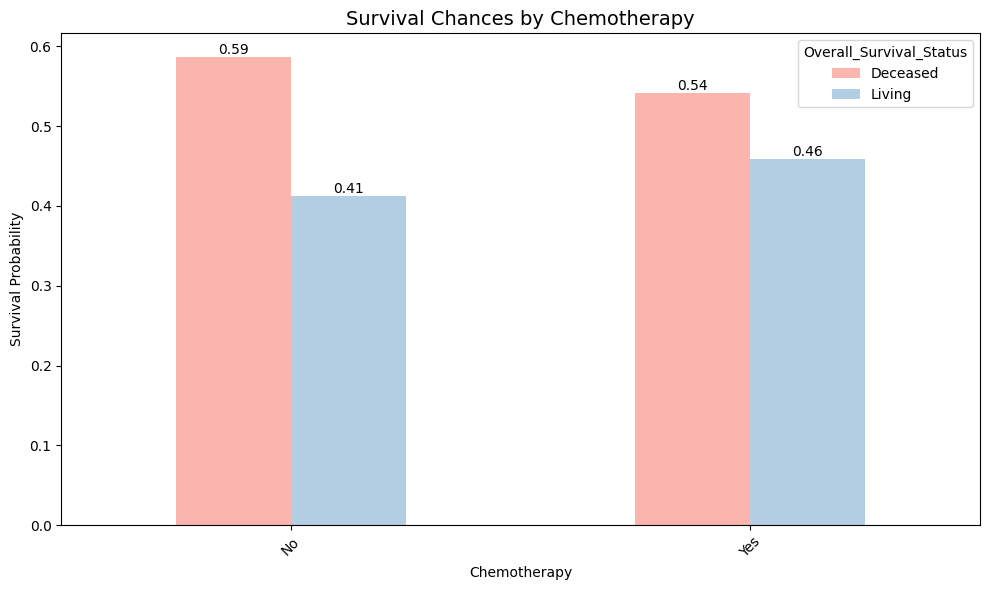

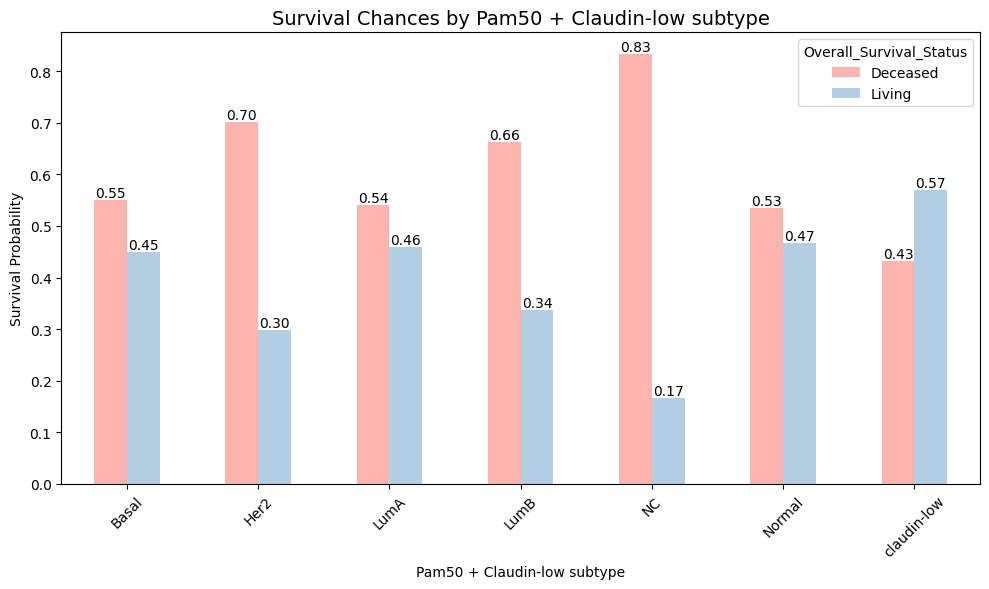

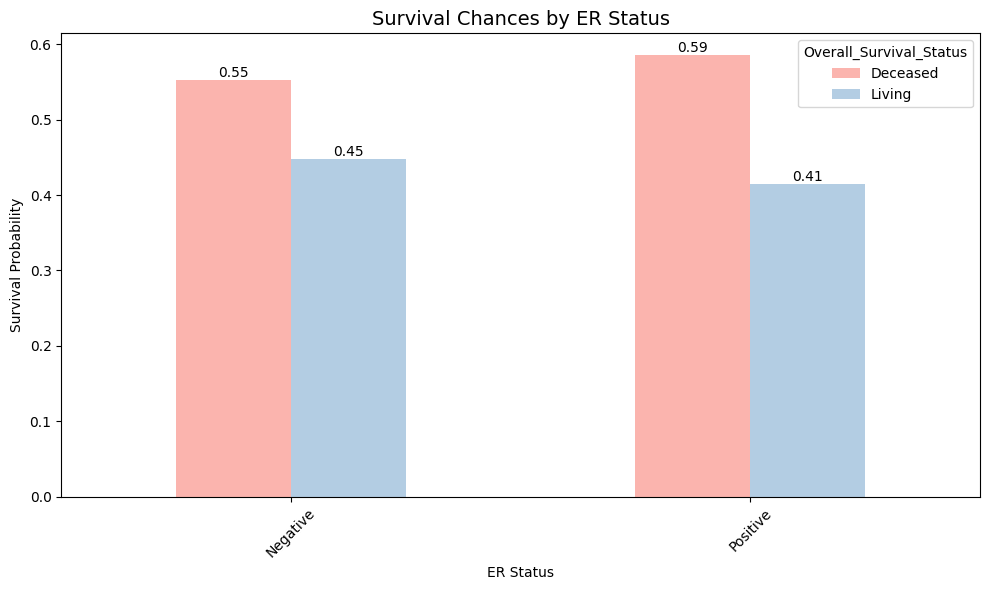

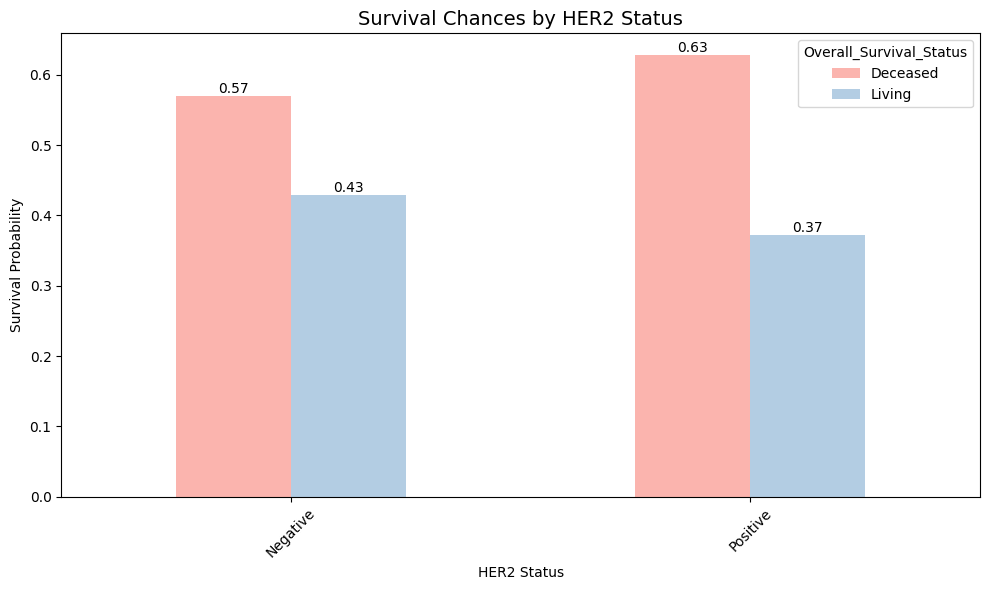

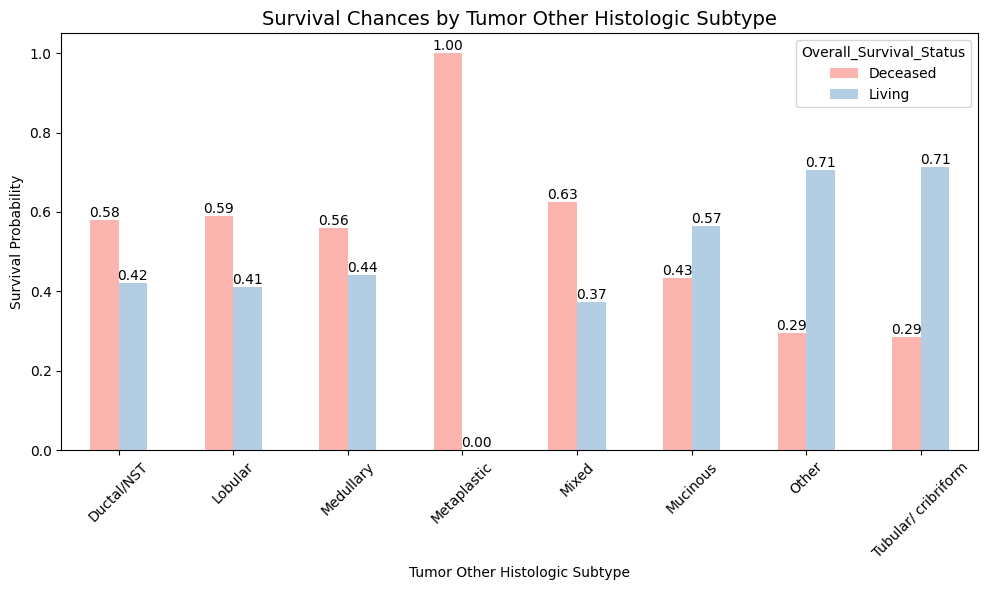

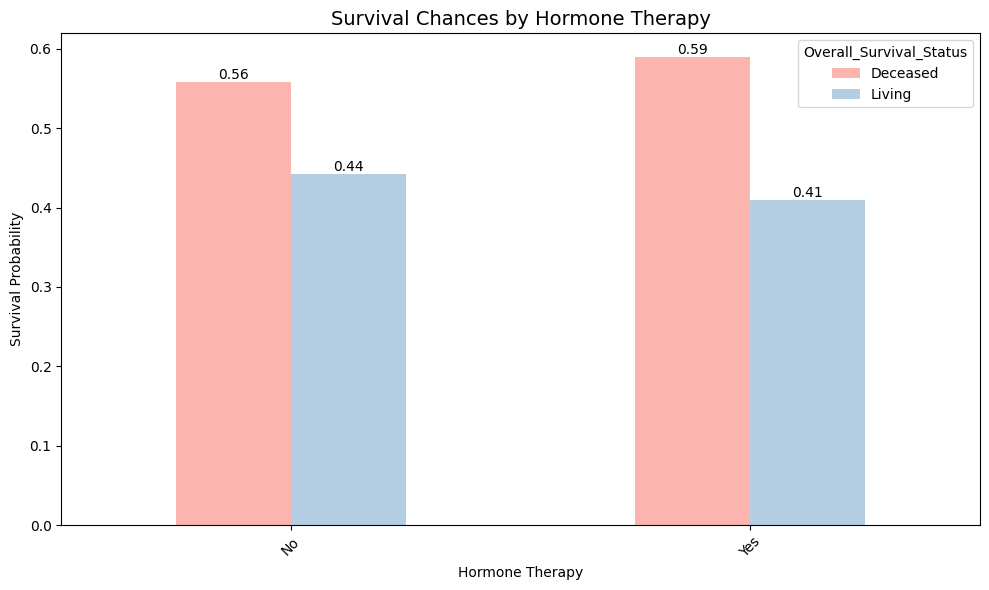

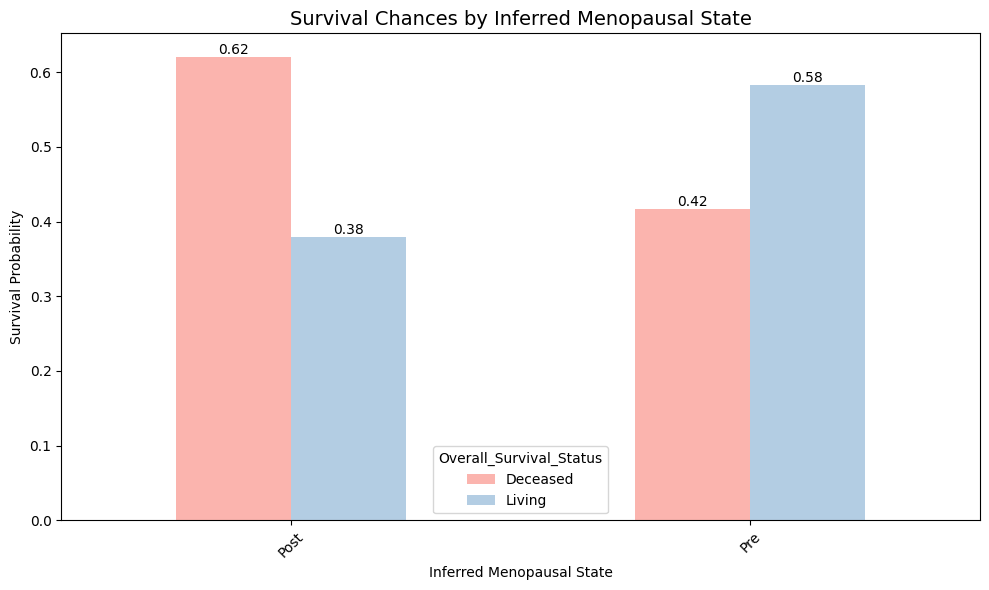

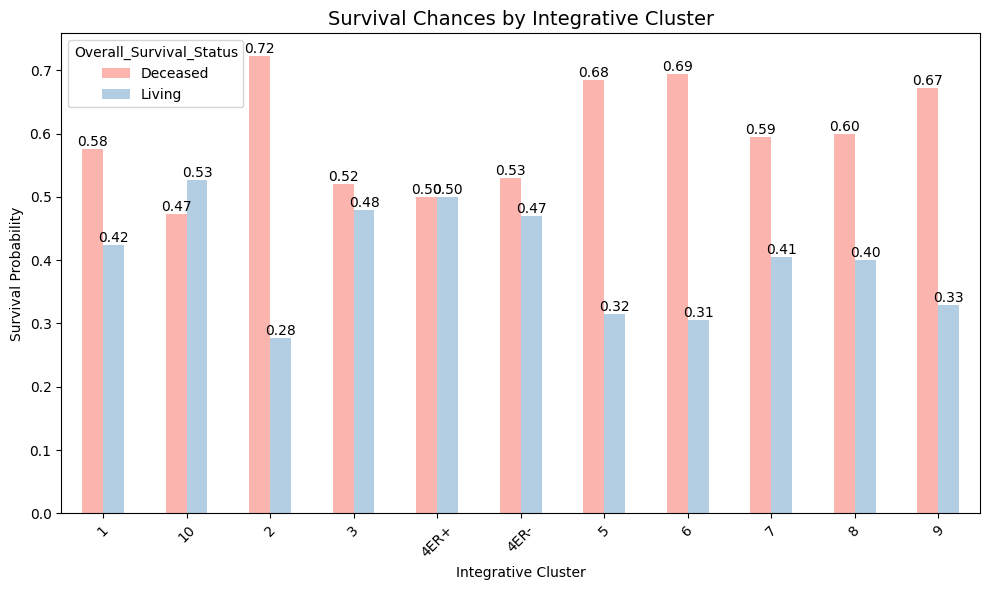

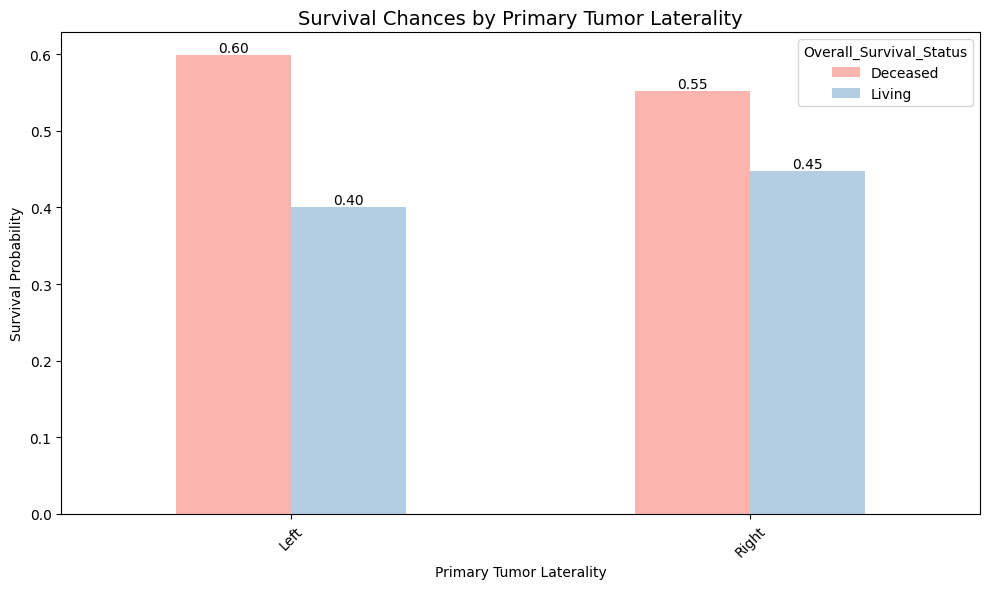

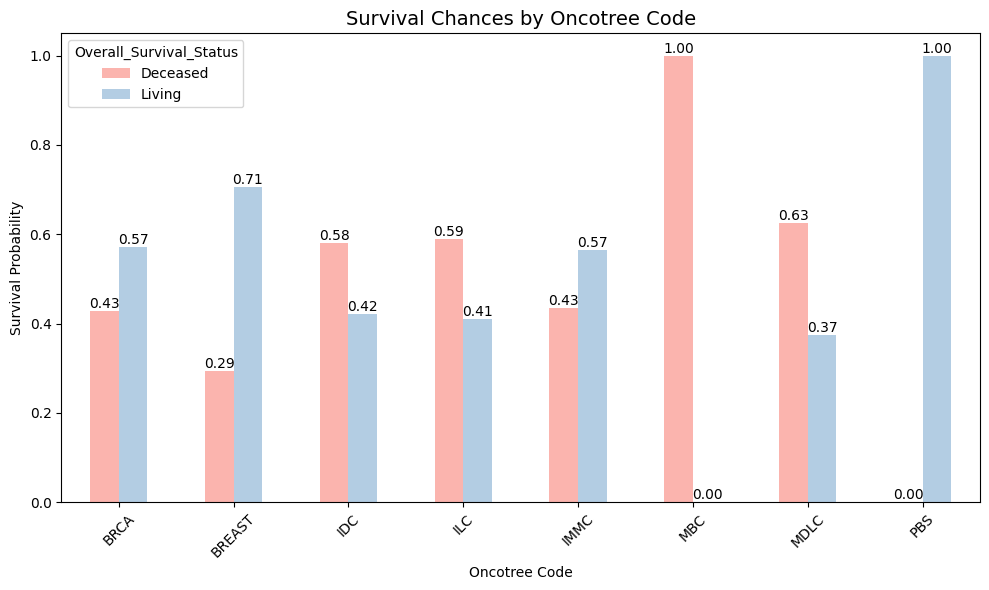

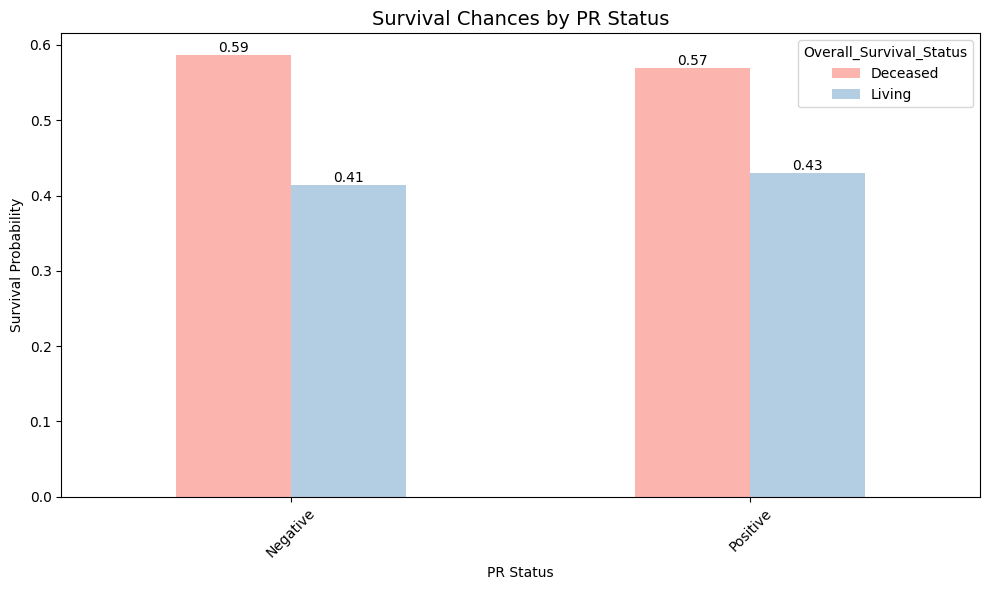

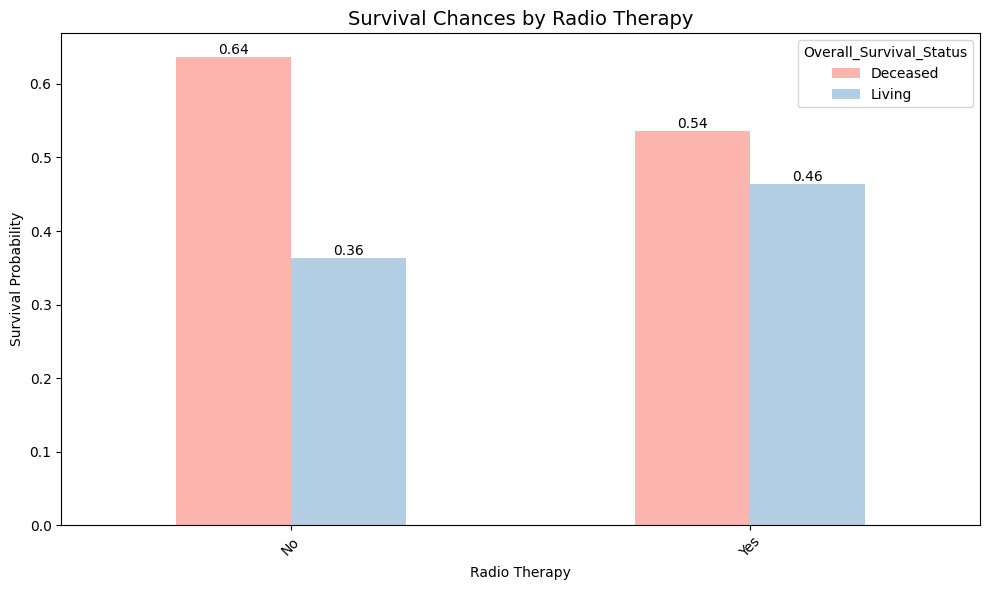

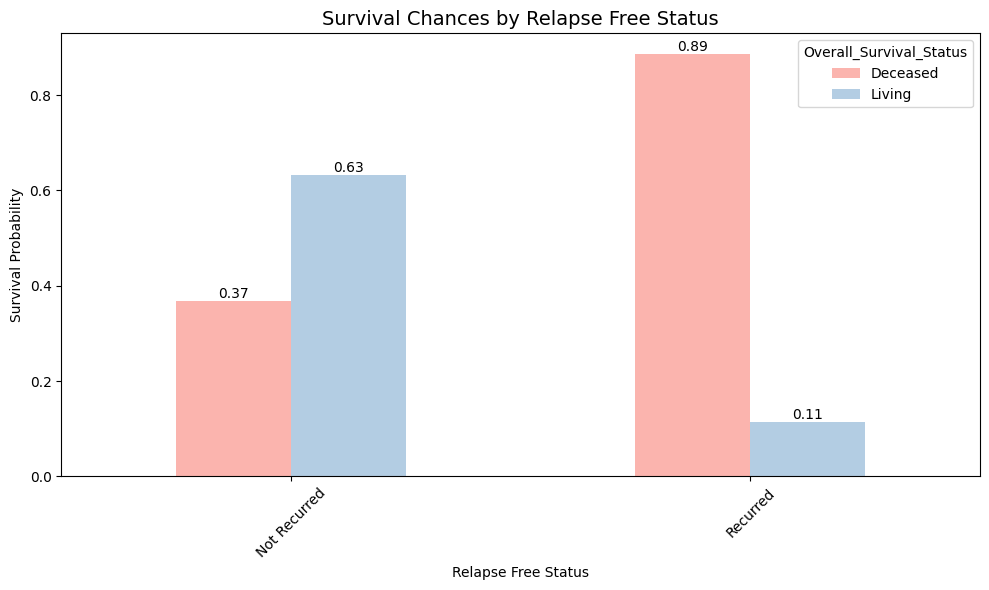

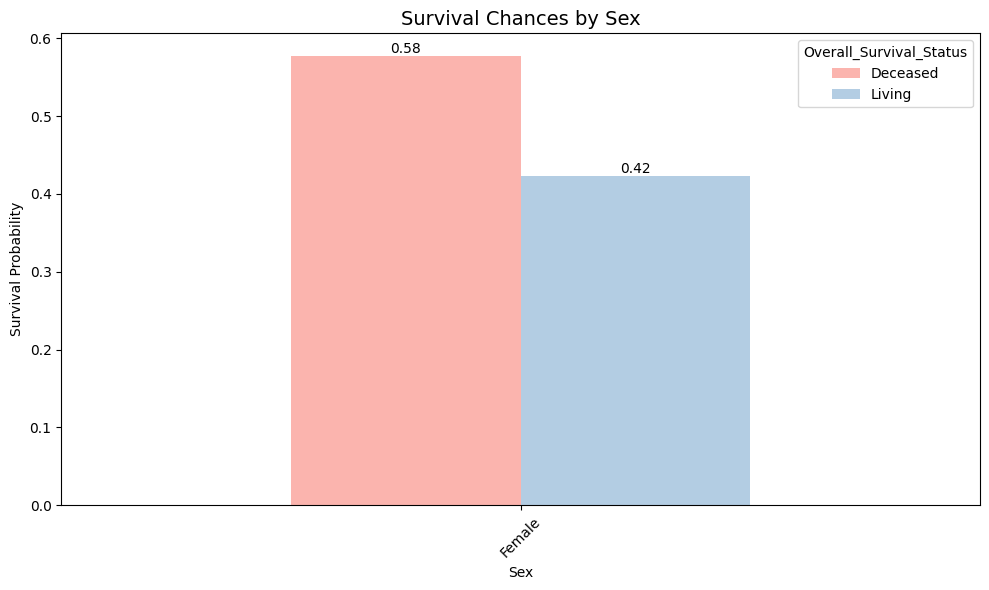

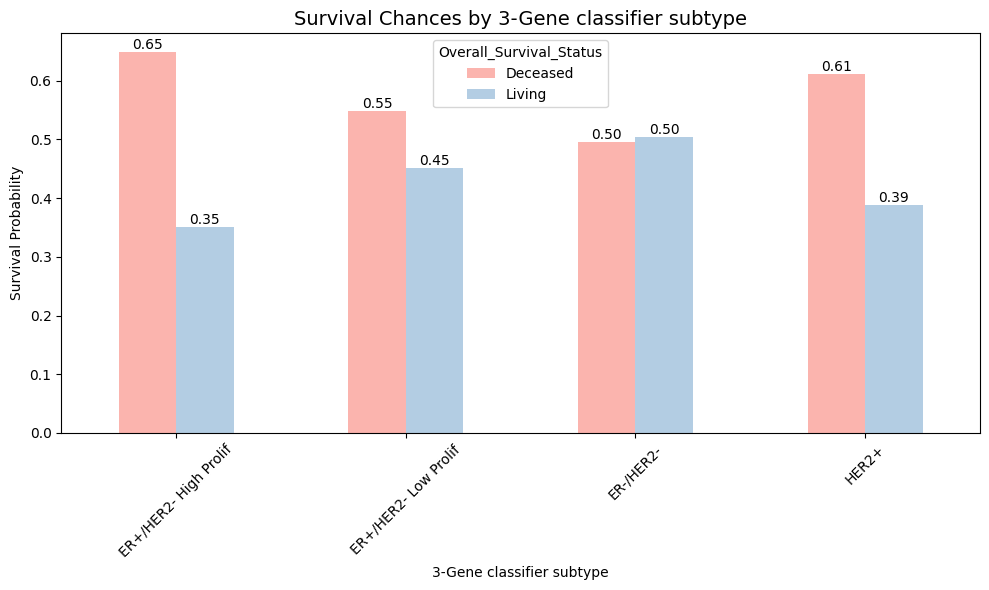

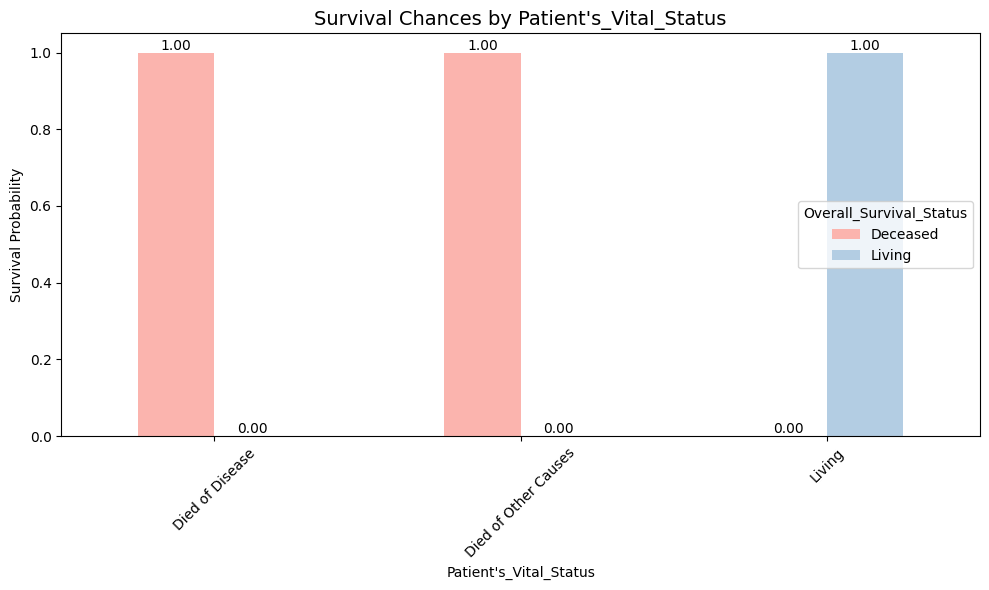

In [43]:
pastel_colors = sns.color_palette("Pastel1", n_colors=df["Overall_Survival_Status"].nunique())

for col in categorical_cols:
    # Compute normalized crosstab (probabilities)
    prop = pd.crosstab(df[col], df["Overall_Survival_Status"], normalize="index")
    
    # Plot with pastel colors
    ax = prop.plot(
        kind="bar",
        figsize=(10,6),
        color=pastel_colors
    )
    
    plt.title(f"Survival Chances by {col}", fontsize=14)
    plt.ylabel("Survival Probability")
    plt.xticks(rotation=45)
    
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge")
    plt.tight_layout()
    plt.show()
    

### Survival chances by numerical values

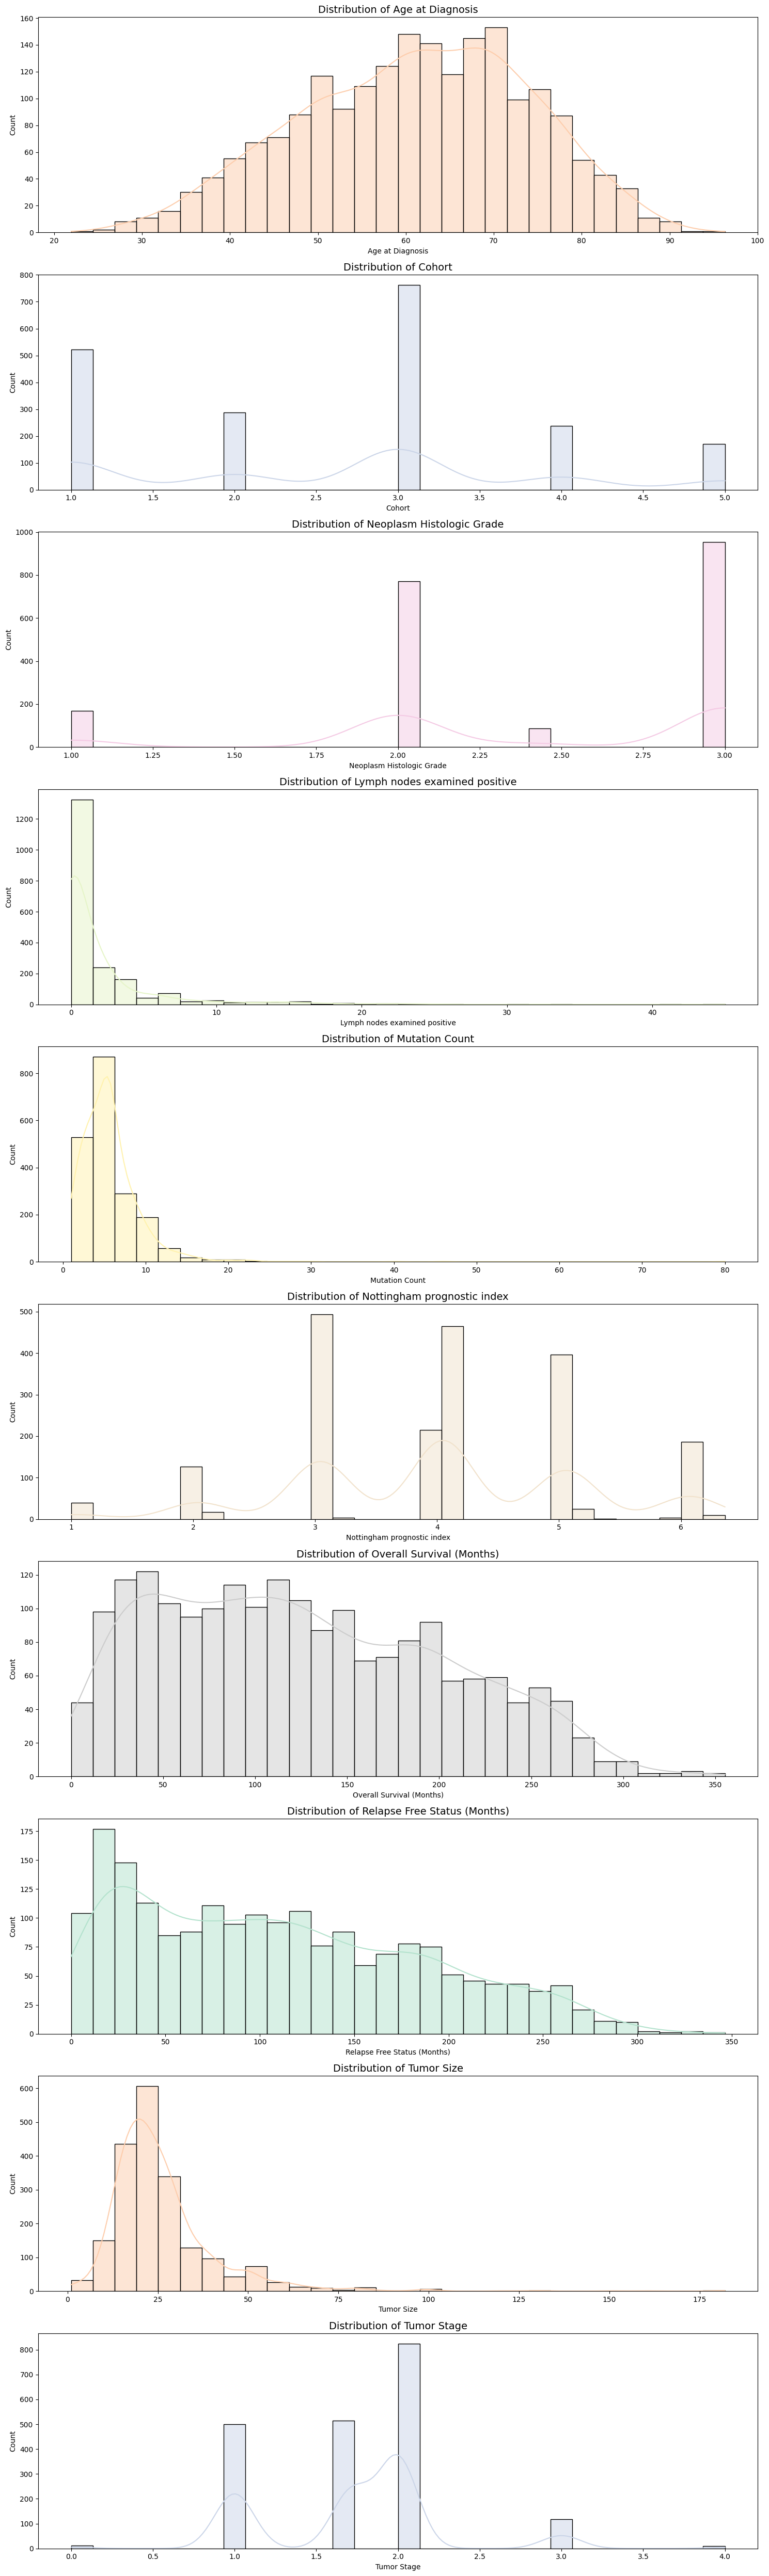

In [44]:
plt.figure(figsize=(15, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    ax = plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(
        data=df,
        x=col,
        kde=True,                 # show smooth density curve
        color=sns.color_palette("Pastel2")[i % 8],  # pastel color
        bins=30
    )
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

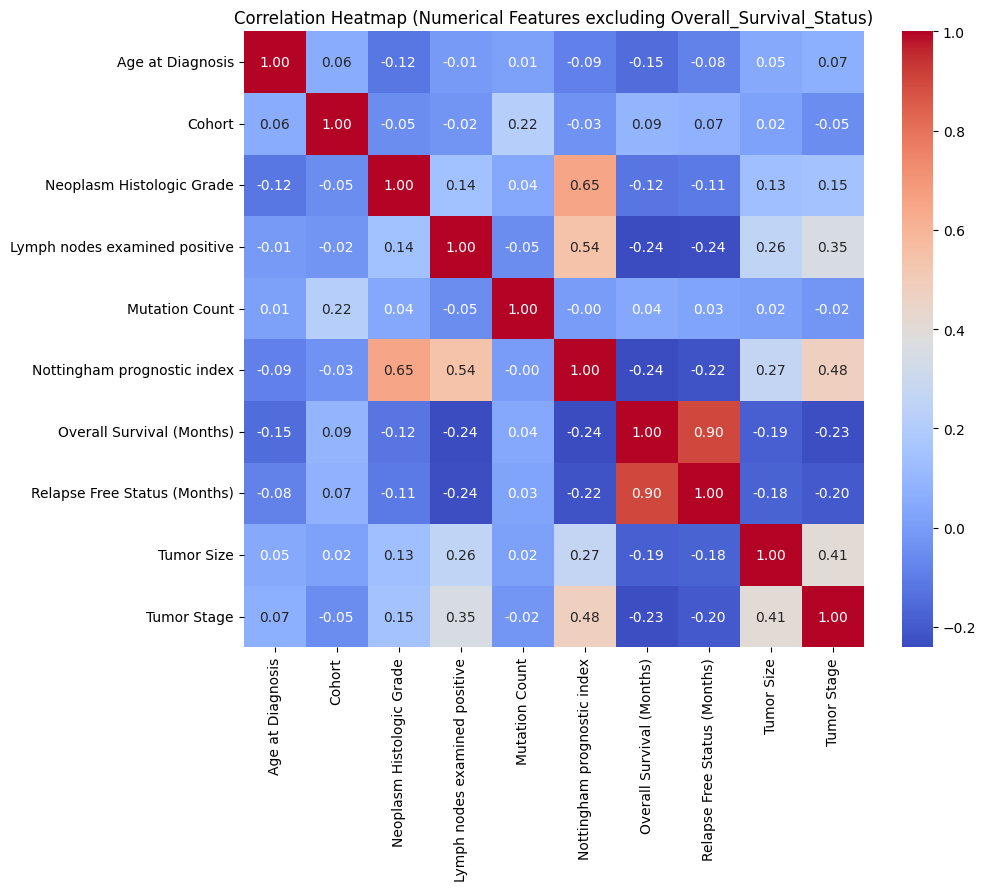

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copy and map target
df_corr = df.copy()
target_map = {"No": 0, "Yes": 1}
df_corr["Overall_Survival_Status"] = df_corr["Overall_Survival_Status"].map(target_map)

# Compute correlation only for numeric columns
corr_data = df_corr.select_dtypes(include="number").corr()

# Drop Overall_Survival_Status from correlation matrix
corr_data = corr_data.drop(columns=["Overall_Survival_Status"], index=["Overall_Survival_Status"])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features excluding Overall_Survival_Status)")
plt.show()